In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Loading pr-defined Boston Dataset
boston_dataset= datasets.load_boston()

In [6]:
#Load the dataset
boston_pd= pd.DataFrame(boston_dataset.data) # we put the boston_dataset into our pandas dataframe
boston_pd.columns= boston_dataset.feature_names
boston_pd_target= np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)
#input
x=boston_pd.iloc[:,:-1] #all the rows without the last column 
#output
y=boston_pd.iloc[:,-1] #all the rows and only the last column

boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
#Splitting the data into training data and testing data
x_train , x_test , y_train , y_test = train_test_split(boston_pd.iloc[:,:-1],boston_pd.iloc[:,-1],
                                                       test_size=0.25)
print ("Train data shape pf x=% and y=% s: "%(x_train.shape, y_train.shape))
print ("Test data shape pf x=% and y=% s: "%(x_test.shape, y_test.shape))

Train data shape pf x=(379, 13)nd y=(379,): 
Test data shape pf x=(127, 13)nd y=(127,): 


In [13]:
#Apply multiple linear regression model
lreg=LinearRegression()
lreg.fit(x_train , y_train)
#Generate prediction on test set
lreg_y_pred= lreg.predict(x_test)
#Calculating Mean Squared Error (mse)
mean_squared_error=np.mean((lreg_y_pred - y_test)**2)
print("Mean Squared Error on test set :" ,mean_squared_error)
#Putting together the coefficient and their corresponding varaiables names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"]= x_train.columns
lreg_coefficient["Coefficient Estimate"]= pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean Squared Error on test set : 20.206469661652438
    Columns  Coefficient Estimate
0      CRIM             -0.116162
1        ZN              0.047459
2     INDUS              0.017303
3      CHAS              3.563503
4       NOX            -19.773895
5        RM              3.593873
6       AGE              0.005344
7       DIS             -1.669598
8       RAD              0.296178
9       TAX             -0.009885
10  PTRATIO             -0.959728
11        B              0.009005
12    LSTAT             -0.582263


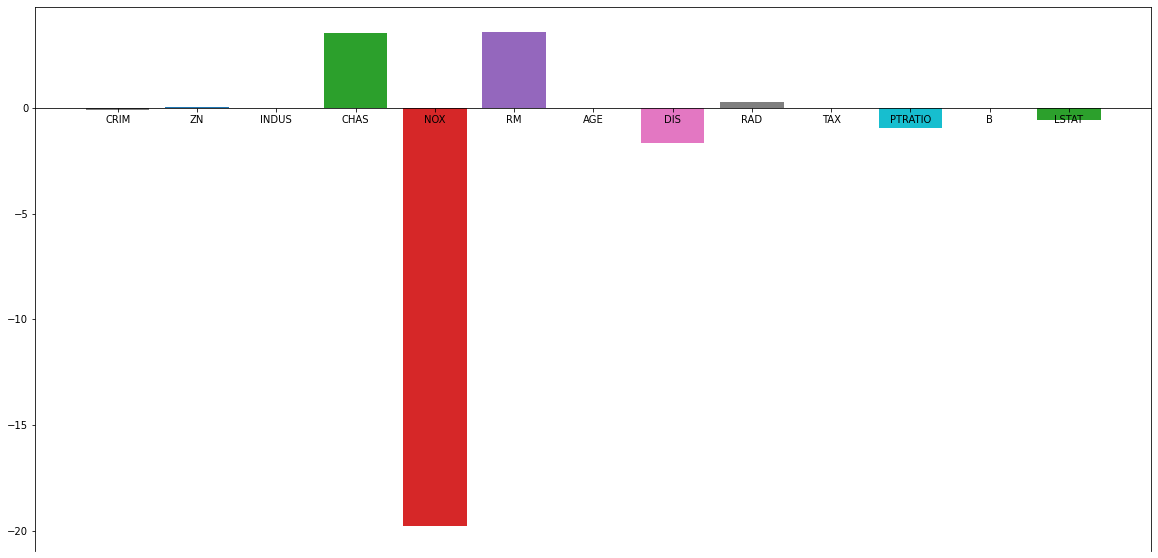

In [16]:
#Plotting the coefficient score 
fig , ax = plt.subplots(figsize=(20,10))
color=['tab:gray','tab:blue','tab:orange',
      'tab:green','tab:red','tab:purple','tab:brown',
      'tab:pink','tab:gray','tab:olive','tab:cyan',
      'tab:orange','tab:green','tab:blue','tab:olive']
ax.bar(lreg_coefficient['Columns'], lreg_coefficient['Coefficient Estimate'],
      color= color)
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

NOX has a huge coefficient => we have to reduce the coefficient score

# Ridge Regression

In [17]:
#Import ridge regression from sklearn library
from sklearn.linear_model import Ridge

#Train the model
ridgeR= Ridge(alpha=1)
ridgeR.fit(x_train,y_train)
y_pred=ridgeR.predict(x_test)
#Calculating Mean Squared Error (mse)
mean_squared_error_ridge=np.mean((y_pred - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error_ridge)
#get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient['Columns']=x_train.columns
ridge_coefficient["Coefficient Estimate"]= pd.Series(ridgeR.coef_)
print(ridge_coefficient)


Mean Squared Error on test set 19.900373600755806
    Columns  Coefficient Estimate
0      CRIM             -0.111218
1        ZN              0.047358
2     INDUS             -0.022649
3      CHAS              3.334143
4       NOX            -10.588923
5        RM              3.723302
6       AGE             -0.002861
7       DIS             -1.508210
8       RAD              0.274390
9       TAX             -0.010460
10  PTRATIO             -0.847183
11        B              0.009842
12    LSTAT             -0.592150


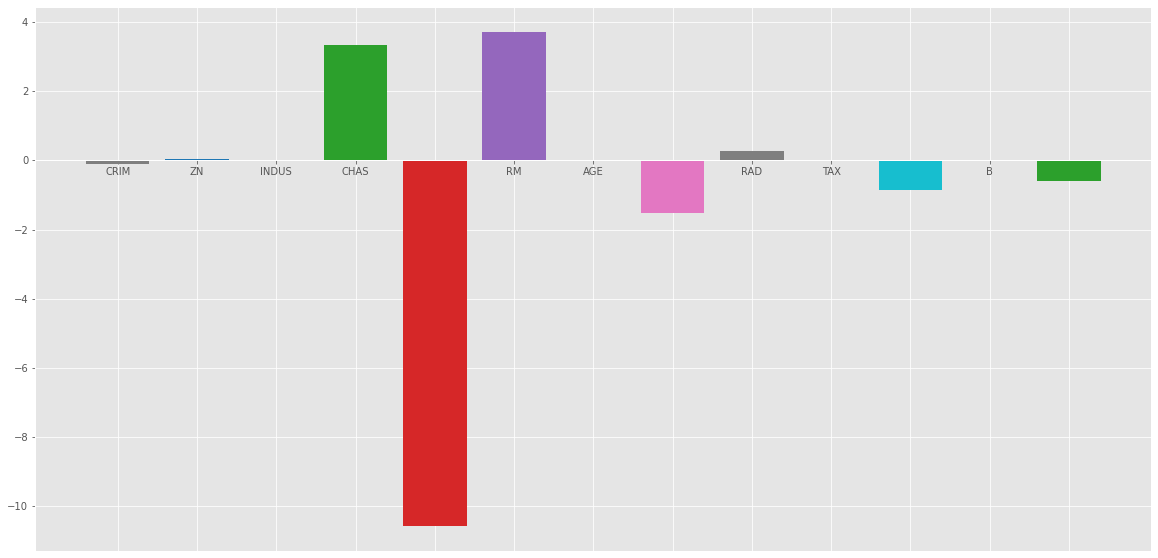

In [18]:
#Plotting the reduced coefficient score 
fig , ax = plt.subplots(figsize=(20,10))
color=['tab:gray','tab:blue','tab:orange',
      'tab:green','tab:red','tab:purple','tab:brown',
      'tab:pink','tab:gray','tab:olive','tab:cyan',
      'tab:orange','tab:green','tab:blue','tab:olive']
ax.bar(ridge_coefficient['Columns'], ridge_coefficient['Coefficient Estimate'],
      color= color)
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

The values now are almost half the values in the graph shown earlier

# Lasso Regression

In [19]:
#Import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

#Train the model
lasso= Lasso(alpha=1)
lasso.fit(x_train,y_train)
y_pred1=lasso.predict(x_test)
#Calculating Mean Squared Error (mse)
mean_squared_error_ridge=np.mean((y_pred1 - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error_ridge)
#get ridge coefficient and print them
lasso_coefficient = pd.DataFrame()
lasso_coefficient['Columns']=x_train.columns
lasso_coefficient["Coefficient Estimate"]= pd.Series(lasso.coef_)
print(lasso_coefficient)


Mean Squared Error on test set 23.738876912667514
    Columns  Coefficient Estimate
0      CRIM             -0.061964
1        ZN              0.042316
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.805702
6       AGE              0.026314
7       DIS             -0.630091
8       RAD              0.235797
9       TAX             -0.012353
10  PTRATIO             -0.681871
11        B              0.007787
12    LSTAT             -0.815863


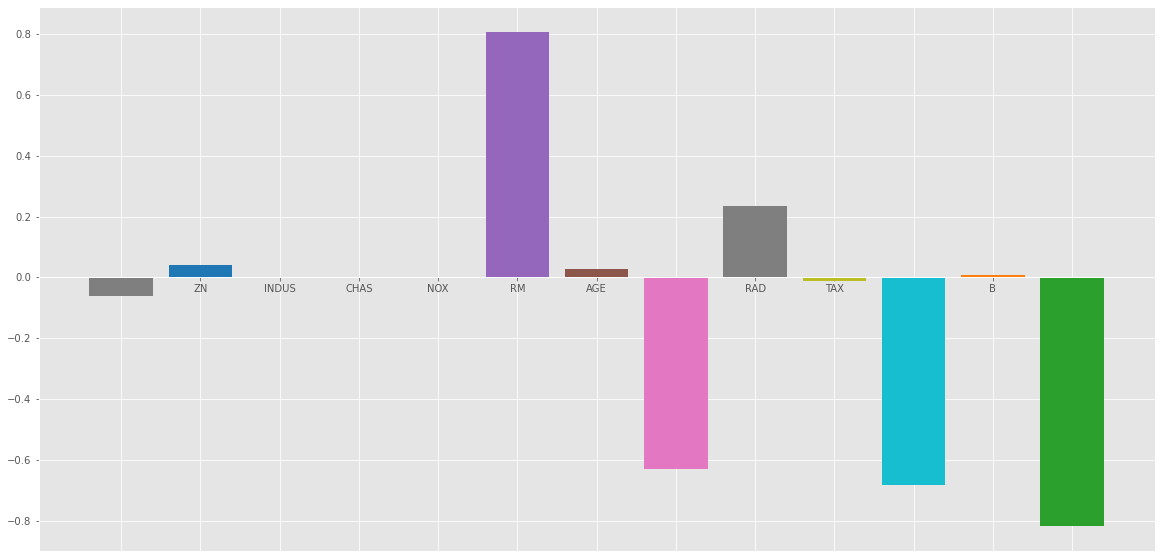

In [20]:
#Plotting the reduced coefficient score 
fig , ax = plt.subplots(figsize=(20,10))
color=['tab:gray','tab:blue','tab:orange',
      'tab:green','tab:red','tab:purple','tab:brown',
      'tab:pink','tab:gray','tab:olive','tab:cyan',
      'tab:orange','tab:green','tab:blue','tab:olive']
ax.bar(lasso_coefficient['Columns'], lasso_coefficient['Coefficient Estimate'],
      color= color)
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()